#Final Project <br> Silmy Sephia Nurashila

##Prepare Dataset

Merge female application history data, male application history data, and credit history has been done at Pentaho

In [85]:
# Data processing
import pandas as pd
import numpy as np
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Model and performance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn import metrics
# Under sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
#Import Data
df = pd.read_csv('/content/drive/My Drive/Celerates/FinalProject/Silmy Sephia Nurashila - Data Preprocessing.csv', delimiter = ';')
df

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,ClientNumber,Gender,KepemilikanMobil,KepemilikanProperti,NumberOfChildren,AnnualIncome,IncomeCategory,EducationLevel,MaterialStatus,WayOfLiving,FlagMobile,FlagWorkPhone,FlagPhone,Email,Occupation,FamilySize,Age,Experience,Overdue
0,5008808,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,Sales staff,1,52,8,Tidak memiliki pinjaman
1,5008809,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,Sales staff,1,52,8,Tidak memiliki pinjaman
2,5008810,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,Sales staff,1,52,8,Tidak memiliki pinjaman
3,5008811,Perempuan,Tidak,Ya,0,270000.0,Asosiasi komersial,Graduate,Belum Menikah,Rumah Pribadi,1,0,1,1,Sales staff,1,52,8,Tidak memiliki pinjaman
4,5008812,Perempuan,Tidak,Ya,0,283500.0,Pensioner,Post Graduate,Cerai,Rumah Pribadi,1,0,0,0,NaN,1,62,1001,Tidak memiliki pinjaman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438451,5009372,Laki-laki,Ya,Tidak,0,115290.0,Pensioner,Graduate,Menikah,Rumah Pribadi,1,0,1,1,NaN,2,64,1001,Tidak memiliki pinjaman
438452,5009373,Laki-laki,Ya,Tidak,0,115290.0,Pensioner,Graduate,Menikah,Rumah Pribadi,1,0,1,1,NaN,2,64,1001,Tidak memiliki pinjaman
438453,6153586,Laki-laki,Ya,Tidak,0,115290.0,Pensioner,Graduate,Menikah,Rumah Pribadi,1,0,1,1,NaN,2,64,1001,NaN
438454,6153587,Laki-laki,Ya,Tidak,0,115290.0,Pensioner,Graduate,Menikah,Rumah Pribadi,1,0,1,1,NaN,2,64,1001,NaN


##Handle Missing Value

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438456 entries, 0 to 438455
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ClientNumber         438456 non-null  int64  
 1   Gender               438456 non-null  object 
 2   KepemilikanMobil     438456 non-null  object 
 3   KepemilikanProperti  438456 non-null  object 
 4   NumberOfChildren     438456 non-null  int64  
 5   AnnualIncome         438456 non-null  float64
 6   IncomeCategory       438456 non-null  object 
 7   EducationLevel       438456 non-null  object 
 8   MaterialStatus       438456 non-null  object 
 9   WayOfLiving          438456 non-null  object 
 10  FlagMobile           438456 non-null  int64  
 11  FlagWorkPhone        438456 non-null  int64  
 12  FlagPhone            438456 non-null  int64  
 13  Email                438456 non-null  int64  
 14  Occupation           304213 non-null  object 
 15  FamilySize       

In [89]:
missing_data = df.isnull().sum()
missing_data 

ClientNumber                0
Gender                      0
KepemilikanMobil            0
KepemilikanProperti         0
NumberOfChildren            0
AnnualIncome                0
IncomeCategory              0
EducationLevel              0
MaterialStatus              0
WayOfLiving                 0
FlagMobile                  0
FlagWorkPhone               0
FlagPhone                   0
Email                       0
Occupation             134243
FamilySize                  0
Age                         0
Experience                  0
Overdue                402106
dtype: int64

Terdapat null pada Occupation dan Overdue

In [90]:
#Missing value pada occupation diisi oleh Etc
df['Occupation'] = df['Occupation'].replace(np.nan, "Etc")

In [91]:
#Nasabah yang digunakan untuk membuat model hanya yang memiliki history pinjaman(overdue). 
#Sehingga nasabah yang tidak ada history peminjaman tidak perlu digunakan.
df = df.dropna() #menghapus data nasabah yang tidak memiliki overdue

In [92]:
#Sudah tidak ada missing value
df.isnull().sum()

ClientNumber           0
Gender                 0
KepemilikanMobil       0
KepemilikanProperti    0
NumberOfChildren       0
AnnualIncome           0
IncomeCategory         0
EducationLevel         0
MaterialStatus         0
WayOfLiving            0
FlagMobile             0
FlagWorkPhone          0
FlagPhone              0
Email                  0
Occupation             0
FamilySize             0
Age                    0
Experience             0
Overdue                0
dtype: int64

In [93]:
shape_data = df.shape
print("(Jumlah Records, Jumlah Variabel) :", shape_data)

(Jumlah Records, Jumlah Variabel) : (36350, 19)


In [94]:
#drop data nasabah yang tidak memiliki pinjaman
df_new = df.drop(df[df['Overdue'] == 'Tidak memiliki pinjaman'].index, axis=0)

In [95]:
df_new

,ClientNumber,Gender,KepemilikanMobil,KepemilikanProperti,NumberOfChildren,AnnualIncome,IncomeCategory,EducationLevel,MaterialStatus,WayOfLiving,FlagMobile,FlagWorkPhone,FlagPhone,Email,Occupation,FamilySize,Age,Experience,Overdue
7,5008825,Perempuan,Ya,Tidak,0,130500.0,Bekerja,Graduate,Menikah,Rumah Pribadi,1,0,0,0,Accountants,2,29,3,Bad Scoring
8,5008826,Perempuan,Ya,Tidak,0,130500.0,Bekerja,Graduate,Menikah,Rumah Pribadi,1,0,0,0,Accountants,2,29,3,Bad Scoring
12,5008834,Perempuan,Tidak,Ya,1,112500.0,Bekerja,Graduate,Belum Menikah,Rumah Pribadi,1,0,0,0,Etc,2,30,4,Good Scoring
15,5008854,Perempuan,Ya,Ya,2,135000.0,Bekerja,Graduate,Menikah,Rumah Pribadi,1,0,0,0,Laborers,4,43,9,Good Scoring
17,5008856,Perempuan,Ya,Ya,2,135000.0,Bekerja,Graduate,Menikah,Rumah Pribadi,1,0,0,0,Laborers,4,43,9,Good Scoring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438436,5008973,Laki-laki,Tidak,Ya,0,157500.0,Bekerja,Graduate,Menikah,Rumah Pribadi,1,0,1,0,Etc,2,44,2,Good Scoring
438438,5009134,Laki-laki,Tidak,Ya,0,382500.0,Pensioner,Graduate,Cerai,Rumah Pribadi,1,0,0,0,Etc,1,59,1001,Good Scoring
438440,5009136,Laki-laki,Tidak,Ya,0,382500.0,Pensioner,Graduate,Cerai,Rumah Pribadi,1,0,0,0,Etc,1,59,1001,Good Scoring
438445,5009143,Laki-laki,Ya,Tidak,0,225000.0,Pensioner,Graduate,Menikah,Rumah Pribadi,1,0,0,0,Etc,2,50,1001,Bad Scoring


Didapatkan data nasabah yang memiliki riwayat kredit adalah 16749

In [96]:
#Export data to drive
df_new.to_csv('/content/drive/My Drive/Celerates/FinalProject/Silmy Sephia Nurashila - Visualisasi.csv')

##Analisis Data

In [ ]:
# Cek Korelasi Data
print(df.corr())

                  ClientNumber  NumberOfChildren  AnnualIncome  FlagMobile  \
ClientNumber          1.000000          0.029627     -0.018212         NaN   
NumberOfChildren      0.029627          1.000000      0.034102         NaN   
AnnualIncome         -0.018212          0.034102      1.000000         NaN   
FlagMobile                 NaN               NaN           NaN         NaN   
FlagWorkPhone         0.081082          0.048292     -0.037040         NaN   
FlagPhone             0.009483         -0.017384      0.017081         NaN   
Email                -0.049905          0.016003      0.085901         NaN   
FamilySize            0.027532          0.889089      0.023939         NaN   
Age                  -0.059117         -0.339096     -0.068228         NaN   
Experience           -0.043589         -0.232304     -0.168172         NaN   

                  FlagWorkPhone  FlagPhone     Email  FamilySize       Age  \
ClientNumber           0.081082   0.009483 -0.049905    0.02753

Dapat dilihat korelasi dari setiap colom dengan colom lainnya, bahwa kolom **FlagMobile** tidak ada korelasi dengan colom lainnya. Colom **Experience** dan colom **Age** juga memiliki nilai korelasi yang rata-rata lemah dengan colom lainnya

In [ ]:
df_new

,ClientNumber,Gender,KepemilikanMobil,KepemilikanProperti,NumberOfChildren,AnnualIncome,IncomeCategory,EducationLevel,MaterialStatus,WayOfLiving,FlagMobile,FlagWorkPhone,FlagPhone,Email,Occupation,FamilySize,Age,Experience,Overdue
7,5008825,Perempuan,Ya,Tidak,0,130500.0,Bekerja,Graduate,Menikah,Rumah Pribadi,1,0,0,0,Accountants,2,29,3,Bad Scoring
8,5008826,Perempuan,Ya,Tidak,0,130500.0,Bekerja,Graduate,Menikah,Rumah Pribadi,1,0,0,0,Accountants,2,29,3,Bad Scoring
12,5008834,Perempuan,Tidak,Ya,1,112500.0,Bekerja,Graduate,Belum Menikah,Rumah Pribadi,1,0,0,0,Etc,2,30,4,Good Scoring
15,5008854,Perempuan,Ya,Ya,2,135000.0,Bekerja,Graduate,Menikah,Rumah Pribadi,1,0,0,0,Laborers,4,43,9,Good Scoring
17,5008856,Perempuan,Ya,Ya,2,135000.0,Bekerja,Graduate,Menikah,Rumah Pribadi,1,0,0,0,Laborers,4,43,9,Good Scoring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438436,5008973,Laki-laki,Tidak,Ya,0,157500.0,Bekerja,Graduate,Menikah,Rumah Pribadi,1,0,1,0,Etc,2,44,2,Good Scoring
438438,5009134,Laki-laki,Tidak,Ya,0,382500.0,Pensioner,Graduate,Cerai,Rumah Pribadi,1,0,0,0,Etc,1,59,1001,Good Scoring
438440,5009136,Laki-laki,Tidak,Ya,0,382500.0,Pensioner,Graduate,Cerai,Rumah Pribadi,1,0,0,0,Etc,1,59,1001,Good Scoring
438445,5009143,Laki-laki,Ya,Tidak,0,225000.0,Pensioner,Graduate,Menikah,Rumah Pribadi,1,0,0,0,Etc,2,50,1001,Bad Scoring


Overdue,Bad Scoring,Good Scoring
Gender,,
Laki-laki,801,4766
Perempuan,1482,9700


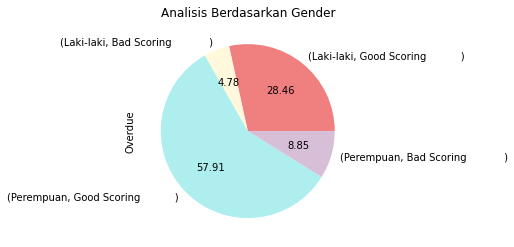

In [ ]:
#Analisis Berdasarkan Gender
groupGender = df_new.groupby('Gender').Overdue.value_counts().plot.pie(autopct = '%.2f', 
                                                                       title = 'Analisis Berdasarkan Gender', 
                                                                       colors = ['lightcoral', 'cornsilk', 'paleturquoise', 'thistle'])
genderOverdue = pd.crosstab(df_new.Gender, df_new.Overdue)
groupGender
genderOverdue

Analisis data berdasarkan gender <br>
Terlihat bahwa: <br>
* Gender **Perempuan** dengan Overdue **Good Scoring** terdapat sebanyak 9.700 (57.91 %)
* Gender **Perempuan** dengan Overdue **Bad Scoring** terdapat sebanyak 1.482 (8.85%)
* Gender **Laki-laki** dengan Overdue **Good Scoring** terdapat sebanyak 4.766 (28.46%)
* Gender **Laki-laki** dengan Overdue **Bad Scoring** terdapat sebanyak 801 (4.78%)

Overdue,Bad Scoring,Good Scoring
KepemilikanMobil,,
Tidak,1446,9017
Ya,837,5449


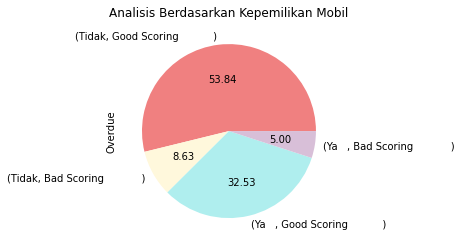

In [ ]:
#Analisis Berdasarkan Kepemilikan Mobil
groupMobil = df_new.groupby('KepemilikanMobil').Overdue.value_counts().plot.pie(autopct = '%.2f', 
                                                                                title = 'Analisis Berdasarkan Kepemilikan Mobil', 
                                                                                colors = ['lightcoral', 'cornsilk', 'paleturquoise', 'thistle'])
mobilOverdue = pd.crosstab(df_new.KepemilikanMobil, df_new.Overdue)
groupMobil
mobilOverdue

Analisis data berdasarkan kepemilikan mobil <br>
Terlihat bahwa: <br>
* **Memiliki Mobil** dengan Overdue **Good Scoring** terdapat sebanyak 5.449 (32.53 %)
* **Memiliki Mobil** dengan Overdue **Bad Scoring** terdapat sebanyak 837 (5%)
* **Tidak Memiliki Mobil** dengan Overdue **Good Scoring** terdapat sebanyak 9.017 (53.84%)
* **Tidak Memiliki Mobil** dengan Overdue **Bad Scoring** terdapat sebanyak 1446 (8.63%)

Overdue,Bad Scoring,Good Scoring
KepemilikanProperti,,
Tidak,869,4687
Ya,1414,9779


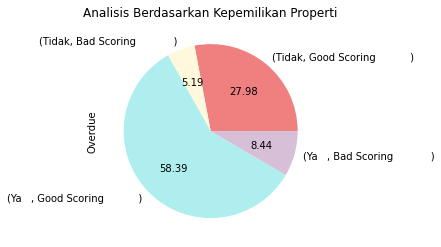

In [ ]:
#Analisis Berdasarkan Kepemilikan Properti
groupProperti = df_new.groupby('KepemilikanProperti').Overdue.value_counts().plot.pie(autopct = '%.2f', 
                                                                                      title = 'Analisis Berdasarkan Kepemilikan Properti', 
                                                                                      colors = ['lightcoral', 'cornsilk', 'paleturquoise', 'thistle'])
propertiOverdue = pd.crosstab(df_new.KepemilikanProperti, df_new.Overdue)
groupProperti
propertiOverdue

Analisis data berdasarkan kepemilikan properti <br>
Terlihat bahwa: <br>
* **Memiliki Properti** dengan Overdue **Good Scoring** terdapat sebanyak 9.779 (58.39 %)
* **Memiliki Properti** dengan Overdue **Bad Scoring** terdapat sebanyak 1.414 (8.44%)
* **Tidak Memiliki Properti** dengan Overdue **Good Scoring** terdapat sebanyak 4.687 (27.98%)
* **Tidak Memiliki Properti** dengan Overdue **Bad Scoring** terdapat sebanyak 869 (5.19%)

Overdue,Bad Scoring,Good Scoring
NumberOfChildren,,
0,1522,9969
1,472,2998
2,251,1295
3,30,174
4,4,25
5,0,4
7,2,0
14,2,0
19,0,1


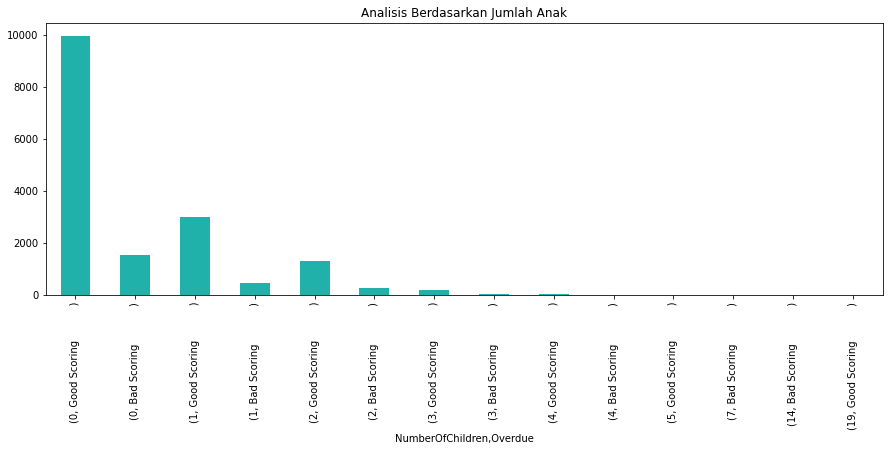

In [ ]:
#Analisis Berdasarkan Jumlah Anak
groupChildren = df_new.groupby('NumberOfChildren').Overdue.value_counts().plot.bar(title = 'Analisis Berdasarkan Jumlah Anak', 
                                                                                   color = 'lightseagreen',
                                                                                   figsize=(15, 5))
childrentiOverdue = pd.crosstab(df_new.NumberOfChildren, df_new.Overdue)
groupChildren
childrentiOverdue

Analisis data berdasarkan jumlah <br>
Terlihat bahwa: <br>
Nasabah yang memiliki **good scoring** tidak memiliki anak

Overdue,Bad Scoring,Good Scoring
IncomeCategory,,
Asosiasi komersial,564,3313
Bekerja,1196,7545
Mahasiswa/Murid,1,2
PNS,208,1135
Pensioner,314,2471


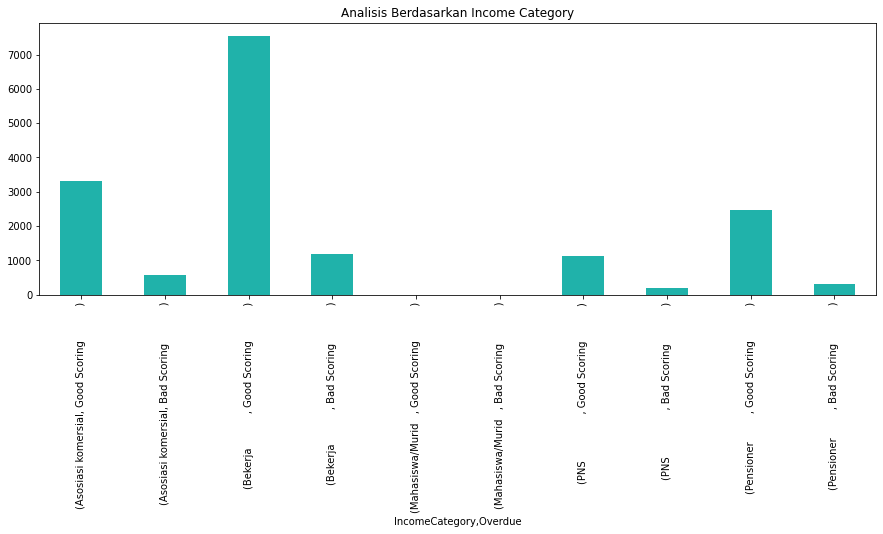

In [ ]:
#Analisis Berdasarkan Income Category
groupIncomeCategory = df_new.groupby('IncomeCategory').Overdue.value_counts().plot.bar(title = 'Analisis Berdasarkan Income Category', 
                                                                                       color = 'lightseagreen',
                                                                                       figsize=(15, 5))
incomeOverdue = pd.crosstab(df_new.IncomeCategory, df_new.Overdue)
groupIncomeCategory
incomeOverdue

Analisis data berdasarkan income category <br>
Terlihat bahwa: <br>
Nasabah yang memiliki status **good scoring** berdasarkan tipe pemasukannya adalah nasabah yang **Bekerja** dan **Asosiasi Komersial**

Overdue,Bad Scoring,Good Scoring
EducationLevel,,
Graduate,1689,10582
Post Graduate,573,3724
Under Graduate,21,160


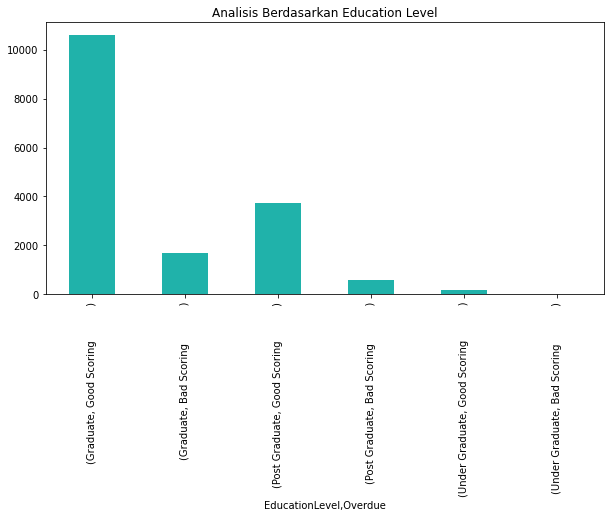

In [ ]:
#Analisis Berdasarkan Education Level
groupEducationLevel = df_new.groupby('EducationLevel').Overdue.value_counts().plot.bar(title = 'Analisis Berdasarkan Education Level', 
                                                                                       color = 'lightseagreen',
                                                                                       figsize=(10, 5))
educationOverdue = pd.crosstab(df_new.EducationLevel, df_new.Overdue)
groupEducationLevel
educationOverdue

Analisis data berdasarkan education level <br>
Terlihat bahwa: <br>
Nasabah yang memiliki status **good scoring** berdasarkan tingkat pendidikannya adalah nasabah yang **Graduated** dan **Post Graduated**

Overdue,Bad Scoring,Good Scoring
MaterialStatus,,
Belum Menikah,336,2027
Cerai,196,1388
Menikah,1751,11051


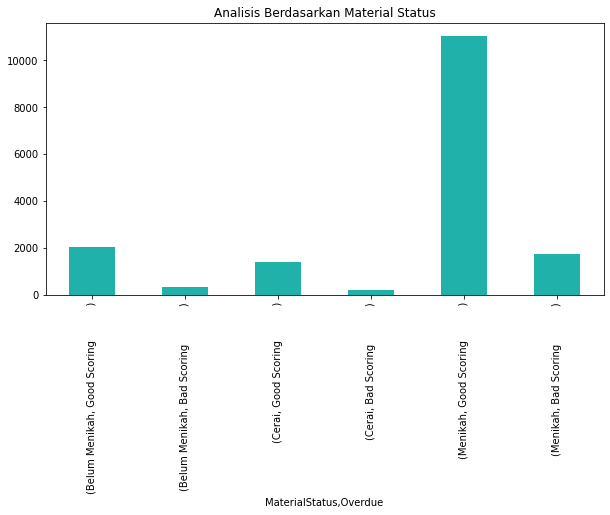

In [ ]:
#Analisis Berdasarkan Material Status
groupMaterialStatus = df_new.groupby('MaterialStatus').Overdue.value_counts().plot.bar(title = 'Analisis Berdasarkan Material Status', 
                                                                                       color = 'lightseagreen',
                                                                                       figsize=(10, 5))
materialstatusOverdue = pd.crosstab(df_new.MaterialStatus, df_new.Overdue)
groupMaterialStatus
materialstatusOverdue

Analisis data berdasarkan material status <br>
Terlihat bahwa: <br>
Nasabah yang memiliki status **good scoring** berdasarkan status keluarganya adalah nasabah yang **Menikah** dan **Belum Menikah**

Overdue,Bad Scoring,Good Scoring
WayOfLiving,,
Apartment Kantor,20,156
Apartment Pribadi,81,394
Rumah Orang Tua,140,757
Rumah Pribadi,2007,12916
Sewa Apartment,35,243


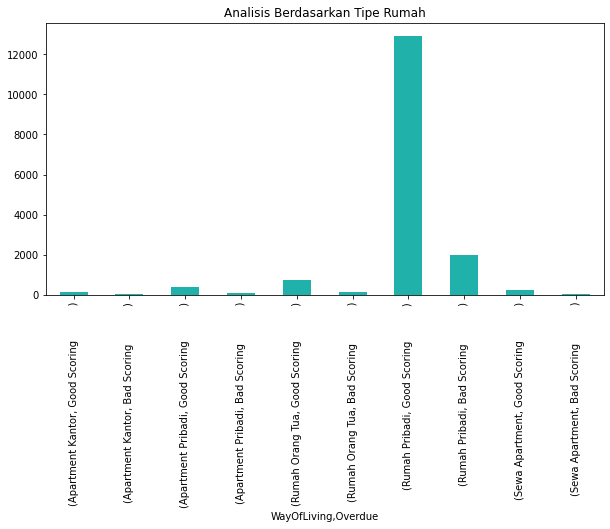

In [ ]:
#Analisis Berdasarkan Tipe Rumah
groupWayOfLiving = df_new.groupby('WayOfLiving').Overdue.value_counts().plot.bar(title = 'Analisis Berdasarkan Tipe Rumah', 
                                                                                 color = 'lightseagreen',
                                                                                 figsize=(10, 5))
livingOverdue = pd.crosstab(df_new.WayOfLiving, df_new.Overdue)
groupWayOfLiving
livingOverdue

Analisis data berdasarkan tipe rumah <br>
Terlihat bahwa: <br>
Nasabah yang memiliki status **good scoring** berdasarkan tipe rumahnya adalah nasabah yang **Rumah Pribadi** dan **Rumah Orang Tua**

Overdue,Bad Scoring,Good Scoring
Occupation,,
Accountants,75,464
Cleaning st,35,219
Cooking sta,51,228
Core staff,260,1300
Drivers,136,860
Etc,637,4536
HR staff,3,43
High skill,98,517
IT staff,9,36


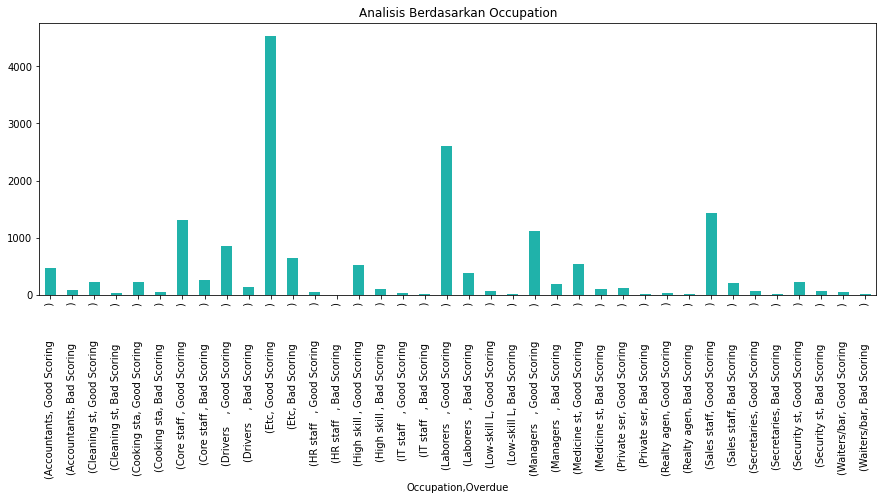

In [ ]:
#Analisis Berdasarkan Occupation
groupOccupation = df_new.groupby('Occupation').Overdue.value_counts().plot.bar(title = 'Analisis Berdasarkan Occupation', 
                                                                               color = 'lightseagreen',
                                                                               figsize=(15, 5))
occupationOverdue = pd.crosstab(df_new.Occupation, df_new.Overdue)
groupOccupation
occupationOverdue

Analisis data berdasarkan pekerjaan <br>
Terlihat bahwa: <br>
Nasabah yang memiliki status **good scoring** berdasarkan pekerjaannya adalah nasabah yang **Etc** dan **Laborers**

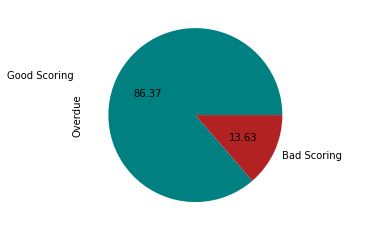

In [ ]:
df_new['Overdue'].value_counts().plot.pie(autopct ='%.2f', colors = ['teal', 'firebrick'])

Dari hasil pre-processing data yang dilakukan, didapatkan data sebanyak 16749 rows × 19 columns. </br>
Dengan jumlah **Good Scoring** sebanyak 14466 (86.37%) dan **Bad Scoring** 2283 (13.63%)

##Pre-Processing Data

In [ ]:
enc=LabelEncoder()

In [ ]:
df_new['Gender']=enc.fit_transform(df_new['Gender'].values)
df_new['KepemilikanMobil']=enc.fit_transform(df_new['KepemilikanMobil'].values)
df_new['KepemilikanProperti']=enc.fit_transform(df_new['KepemilikanProperti'].values)
df_new['IncomeCategory']=enc.fit_transform(df_new['IncomeCategory'].values)
df_new['EducationLevel']=enc.fit_transform(df_new['EducationLevel'].values)
df_new['MaterialStatus']=enc.fit_transform(df_new['MaterialStatus'].values)
df_new['WayOfLiving']=enc.fit_transform(df_new['WayOfLiving'].values)
df_new['Occupation']=enc.fit_transform(df_new['Occupation'].values)

In [ ]:
df_new

,ClientNumber,Gender,KepemilikanMobil,KepemilikanProperti,NumberOfChildren,AnnualIncome,IncomeCategory,EducationLevel,MaterialStatus,WayOfLiving,FlagMobile,FlagWorkPhone,FlagPhone,Email,Occupation,FamilySize,Age,Experience,Overdue
7,5008825,1,1,0,0,130500.0,1,0,2,3,1,0,0,0,0,2,29,3,Bad Scoring
8,5008826,1,1,0,0,130500.0,1,0,2,3,1,0,0,0,0,2,29,3,Bad Scoring
12,5008834,1,0,1,1,112500.0,1,0,0,3,1,0,0,0,5,2,30,4,Good Scoring
15,5008854,1,1,1,2,135000.0,1,0,2,3,1,0,0,0,9,4,43,9,Good Scoring
17,5008856,1,1,1,2,135000.0,1,0,2,3,1,0,0,0,9,4,43,9,Good Scoring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438436,5008973,0,0,1,0,157500.0,1,0,2,3,1,0,1,0,5,2,44,2,Good Scoring
438438,5009134,0,0,1,0,382500.0,4,0,1,3,1,0,0,0,5,1,59,1001,Good Scoring
438440,5009136,0,0,1,0,382500.0,4,0,1,3,1,0,0,0,5,1,59,1001,Good Scoring
438445,5009143,0,1,0,0,225000.0,4,0,2,3,1,0,0,0,5,2,50,1001,Bad Scoring


In [ ]:
y = df_new.pop('Overdue')
y.head()

7     Bad Scoring            
8     Bad Scoring            
12    Good Scoring           
15    Good Scoring           
17    Good Scoring           
Name: Overdue, dtype: object

In [ ]:
pd.value_counts(y)

Good Scoring               14466
Bad Scoring                 2283
Name: Overdue, dtype: int64

###Random Undersampling

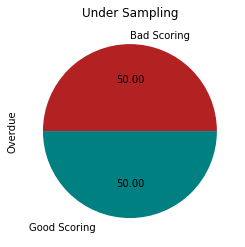

In [ ]:
#Melakukan undersampling karena perbedaan jumlah data yang ada jauh
rus = RandomOverSampler(sampling_strategy = 1)
df_new_res, y_res = rus.fit_resample(df_new, y)

ax = y_res.value_counts().plot.pie(autopct ='%.2f', colors = ['firebrick', 'teal'])
_ = ax.set_title("Under Sampling")

Dilakukannya proses random undersampling karena jumlah data antara good scoring dengan bad scoring jauh atau data tersebut imbalance. <br>
Fungsi ini bertujuan untuk menyeimbangkan distribusi kelas melalui penghapusan acak contoh kelas mayoritas.

In [ ]:
y_res.value_counts()

Bad Scoring                14466
Good Scoring               14466
Name: Overdue, dtype: int64

In [ ]:
print(df_new_res.shape)
print(y_res.shape)

(28932, 18)
(28932,)


Dilakukan undersampling karena jumlah data tidak balance <br>
Dan setelah dilakukan proses undersampling, data yang baru berjumlah 28932 untuk kategori good scoring dan bad scoring

##Modeling

In [ ]:
X_undersampling = df_new_res
Y_undersampling = y_res

In [ ]:
X_train_undersample, X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersampling, Y_undersampling, test_size = 0.30, random_state = 42)

In [ ]:
#Mengetahui shape dari data X (train dan test) dan y (train dan test)
print("X_train shape:", X_train_undersample.shape)
print("X_tes shape:", X_test_undersample.shape)
print("y_train shape:", y_train_undersample.shape)
print("y_tes shape:", y_test_undersample.shape)

X_train shape: (20252, 18)
X_tes shape: (8680, 18)
y_train shape: (20252,)
y_tes shape: (8680,)


In [ ]:
#Cek null data X train
X_train_undersample.isnull().sum()

ClientNumber           0
Gender                 0
KepemilikanMobil       0
KepemilikanProperti    0
NumberOfChildren       0
AnnualIncome           0
IncomeCategory         0
EducationLevel         0
MaterialStatus         0
WayOfLiving            0
FlagMobile             0
FlagWorkPhone          0
FlagPhone              0
Email                  0
Occupation             0
FamilySize             0
Age                    0
Experience             0
dtype: int64

In [ ]:
#Cek null data X test
X_test_undersample.isnull().sum()

ClientNumber           0
Gender                 0
KepemilikanMobil       0
KepemilikanProperti    0
NumberOfChildren       0
AnnualIncome           0
IncomeCategory         0
EducationLevel         0
MaterialStatus         0
WayOfLiving            0
FlagMobile             0
FlagWorkPhone          0
FlagPhone              0
Email                  0
Occupation             0
FamilySize             0
Age                    0
Experience             0
dtype: int64

Data telah siap untuk dilakukan modeling

###SVM

In [ ]:
svm_clf = svm.SVC(gamma='auto')

In [ ]:
svm_clf.fit(X_train_undersample, y_train_undersample)

SVC(gamma='auto')

In [ ]:
y_pred_svm = svm_clf.predict(X_test_undersample)

In [ ]:
print(classification_report(y_test_undersample, y_pred_svm))

                         precision    recall  f1-score   support

Bad Scoring                   0.92      0.97      0.94      4303
Good Scoring                  0.97      0.92      0.94      4377

               accuracy                           0.94      8680
              macro avg       0.94      0.94      0.94      8680
           weighted avg       0.94      0.94      0.94      8680



###Random Forest Classifier

In [ ]:
rfc_clf = RandomForestClassifier(n_estimators=100)

In [ ]:
rfc_clf.fit(X_train_undersample, y_train_undersample)

RandomForestClassifier()

In [ ]:
y_pred_rfc = rfc_clf.predict(X_test_undersample)

In [ ]:
print(classification_report(y_test_undersample, y_pred_rfc))

                         precision    recall  f1-score   support

Bad Scoring                   0.93      0.99      0.96      4303
Good Scoring                  0.99      0.92      0.96      4377

               accuracy                           0.96      8680
              macro avg       0.96      0.96      0.96      8680
           weighted avg       0.96      0.96      0.96      8680



Setelah melakukan modeling dengan 2 model machine learning, berikut hasil yang didapatkan: <br>
Model SVM menghasilkan f1-score accuracy sebesar : 95% <br>
Model Random Forest Classifier menghasilkan f1-score accuracy sebesar : 96% <br>

Maka model yang akan digunakan untu **Data Test** adalah model **Random Forest Classifier**

##Data Test

###Data Preparation

In [ ]:
#Import Data
df_test = pd.read_csv('/content/drive/My Drive/Celerates/FinalProject/data_test.csv', delimiter = ',')
df_test

,Id_customer,JK,KepemilikanMobil,KepemilikanProperti,JmlAnak,Pendapatan,TipePendapatan,TingkatPendidikan,StatusKeluarga,TipeRumah,FlagMobile,FlagWorkPhone,FlagPhone,Email,Pekerjaan,JmlAnggotaKeluarga,Age,Experience
0,5142248,Perempuan,Tidak,Ya,0,225000.0,PNS,Graduate,Menikah,Rumah pribadi,1,0,0,0,Private service staff,2.0,54.0,6.0
1,5036925,Perempuan,Ya,Ya,0,157500.0,Asosiasi komersial,Graduate,Menikah,Rumah pribadi,1,1,1,1,Core staff,2.0,33.0,8.0
2,5126080,Perempuan,Tidak,Ya,1,112500.0,PNS,Graduate,Menikah,Rumah pribadi,1,0,0,0,Managers,3.0,41.0,7.0
3,5088887,Perempuan,Tidak,Ya,0,171000.0,Bekerja,Graduate,Belum Menikah,Sewa Apartemen,1,0,0,0,Laborers,1.0,46.0,2.0
4,5022156,Perempuan,Ya,Ya,2,180000.0,Asosiasi komersial,Postgraduate,Menikah,Rumah pribadi,1,0,1,1,NaN,4.0,32.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,5105368,Laki-laki,Tidak,Ya,0,360000.0,Bekerja,Graduate,Menikah,Rumah pribadi,1,1,0,0,Laborers,2.0,50.0,29.0
196,5116026,Perempuan,Tidak,Ya,0,135000.0,Pensioner,Graduate,Menikah,Rumah pribadi,1,0,0,0,NaN,2.0,56.0,1001.0
197,5067627,Perempuan,Tidak,Tidak,1,67500.0,Bekerja,Graduate,Menikah,Rumah pribadi,1,0,0,0,Laborers,3.0,45.0,19.0
198,5090052,Laki-laki,Ya,Ya,0,270000.0,Asosiasi komersial,Postgraduate,Menikah,Rumah pribadi,1,0,0,0,Managers,2.0,58.0,5.0


In [ ]:
missingvalue_test = df_test.isnull().sum()
missingvalue_test

Id_customer             0
JK                      0
KepemilikanMobil        0
KepemilikanProperti     0
JmlAnak                 0
Pendapatan              0
TipePendapatan          0
TingkatPendidikan       0
StatusKeluarga          0
TipeRumah               0
FlagMobile              0
FlagWorkPhone           0
FlagPhone               0
Email                   0
Pekerjaan              59
JmlAnggotaKeluarga      0
Age                     0
Experience              0
dtype: int64

Terdapat missing value pada kolom pekerjaan

In [ ]:
#Missing value pada pekerjaan diisi oleh Etc
df_test['Pekerjaan'] = df_test['Pekerjaan'].replace(np.nan, "Etc")

In [ ]:
df_test.isnull().sum()

Id_customer            0
JK                     0
KepemilikanMobil       0
KepemilikanProperti    0
JmlAnak                0
Pendapatan             0
TipePendapatan         0
TingkatPendidikan      0
StatusKeluarga         0
TipeRumah              0
FlagMobile             0
FlagWorkPhone          0
FlagPhone              0
Email                  0
Pekerjaan              0
JmlAnggotaKeluarga     0
Age                    0
Experience             0
dtype: int64

Misisng value pada data test sudah tidak ada

In [ ]:
#Menyesuaikan nama kolom dengan data modeling
df_test.rename(columns = {"Id_customer": "ClientNumber",
                          "JK": "Gender",
                          "JmlAnak": "NumberOfChildren",
                          "Pendapatan": "AnnualIncome",
                          "TipePendapatan": "IncomeCategory",
                          "TingkatPendidikan": "EducationLevel",
                          "StatusKeluarga": "MaterialStatus",
                          "TipeRumah": "WayOfLiving",
                          "Pekerjaan": "Occupation",
                          "JmlAnggotaKeluarga": "FamilySize"}, inplace=True)

In [ ]:
df_test

,ClientNumber,Gender,KepemilikanMobil,KepemilikanProperti,NumberOfChildren,AnnualIncome,IncomeCategory,EducationLevel,MaterialStatus,WayOfLiving,FlagMobile,FlagWorkPhone,FlagPhone,Email,Occupation,FamilySize,Age,Experience
0,5142248,Perempuan,Tidak,Ya,0,225000.0,PNS,Graduate,Menikah,Rumah pribadi,1,0,0,0,Private service staff,2.0,54.0,6.0
1,5036925,Perempuan,Ya,Ya,0,157500.0,Asosiasi komersial,Graduate,Menikah,Rumah pribadi,1,1,1,1,Core staff,2.0,33.0,8.0
2,5126080,Perempuan,Tidak,Ya,1,112500.0,PNS,Graduate,Menikah,Rumah pribadi,1,0,0,0,Managers,3.0,41.0,7.0
3,5088887,Perempuan,Tidak,Ya,0,171000.0,Bekerja,Graduate,Belum Menikah,Sewa Apartemen,1,0,0,0,Laborers,1.0,46.0,2.0
4,5022156,Perempuan,Ya,Ya,2,180000.0,Asosiasi komersial,Postgraduate,Menikah,Rumah pribadi,1,0,1,1,Etc,4.0,32.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,5105368,Laki-laki,Tidak,Ya,0,360000.0,Bekerja,Graduate,Menikah,Rumah pribadi,1,1,0,0,Laborers,2.0,50.0,29.0
196,5116026,Perempuan,Tidak,Ya,0,135000.0,Pensioner,Graduate,Menikah,Rumah pribadi,1,0,0,0,Etc,2.0,56.0,1001.0
197,5067627,Perempuan,Tidak,Tidak,1,67500.0,Bekerja,Graduate,Menikah,Rumah pribadi,1,0,0,0,Laborers,3.0,45.0,19.0
198,5090052,Laki-laki,Ya,Ya,0,270000.0,Asosiasi komersial,Postgraduate,Menikah,Rumah pribadi,1,0,0,0,Managers,2.0,58.0,5.0


In [ ]:
df_test['Gender']=enc.fit_transform(df_test['Gender'].values)
df_test['KepemilikanMobil']=enc.fit_transform(df_test['KepemilikanMobil'].values)
df_test['KepemilikanProperti']=enc.fit_transform(df_test['KepemilikanProperti'].values)
df_test['IncomeCategory']=enc.fit_transform(df_test['IncomeCategory'].values)
df_test['EducationLevel']=enc.fit_transform(df_test['EducationLevel'].values)
df_test['MaterialStatus']=enc.fit_transform(df_test['MaterialStatus'].values)
df_test['WayOfLiving']=enc.fit_transform(df_test['WayOfLiving'].values)
df_test['Occupation']=enc.fit_transform(df_test['Occupation'].values)

In [ ]:
df_test

,ClientNumber,Gender,KepemilikanMobil,KepemilikanProperti,NumberOfChildren,AnnualIncome,IncomeCategory,EducationLevel,MaterialStatus,WayOfLiving,FlagMobile,FlagWorkPhone,FlagPhone,Email,Occupation,FamilySize,Age,Experience
0,5142248,1,0,1,0,225000.0,2,0,2,3,1,0,0,0,10,2.0,54.0,6.0
1,5036925,1,1,1,0,157500.0,0,0,2,3,1,1,1,1,3,2.0,33.0,8.0
2,5126080,1,0,1,1,112500.0,2,0,2,3,1,0,0,0,8,3.0,41.0,7.0
3,5088887,1,0,1,0,171000.0,1,0,0,4,1,0,0,0,7,1.0,46.0,2.0
4,5022156,1,1,1,2,180000.0,0,1,2,3,1,0,1,1,5,4.0,32.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,5105368,0,0,1,0,360000.0,1,0,2,3,1,1,0,0,7,2.0,50.0,29.0
196,5116026,1,0,1,0,135000.0,3,0,2,3,1,0,0,0,5,2.0,56.0,1001.0
197,5067627,1,0,0,1,67500.0,1,0,2,3,1,0,0,0,7,3.0,45.0,19.0
198,5090052,0,1,1,0,270000.0,0,1,2,3,1,0,0,0,8,2.0,58.0,5.0


###Prediksi

####Prediksi Random Forest

In [ ]:
#PREDIKSI DENGAN RANDOM FOREST CLASSIFIER
statsuOverdue = rfc_clf.predict(df_test)

In [ ]:
a = [int(i) for i in range(0, len(statsuOverdue))]
Overdue = pd.DataFrame(statsuOverdue, index=a, columns=[('Overdue')])

In [ ]:
# Model prediksi yang digunakan adalah Random Forest Classifier
dataPrediksi = pd.concat([df_test, Overdue], axis=1, ignore_index=False)

In [ ]:
dataPrediksi

,ClientNumber,Gender,KepemilikanMobil,KepemilikanProperti,NumberOfChildren,AnnualIncome,IncomeCategory,EducationLevel,MaterialStatus,WayOfLiving,FlagMobile,FlagWorkPhone,FlagPhone,Email,Occupation,FamilySize,Age,Experience,Overdue
0,5142248,1,0,1,0,225000.0,2,0,2,3,1,0,0,0,10,2.0,54.0,6.0,Good Scoring
1,5036925,1,1,1,0,157500.0,0,0,2,3,1,1,1,1,3,2.0,33.0,8.0,Good Scoring
2,5126080,1,0,1,1,112500.0,2,0,2,3,1,0,0,0,8,3.0,41.0,7.0,Good Scoring
3,5088887,1,0,1,0,171000.0,1,0,0,4,1,0,0,0,7,1.0,46.0,2.0,Bad Scoring
4,5022156,1,1,1,2,180000.0,0,1,2,3,1,0,1,1,5,4.0,32.0,8.0,Good Scoring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,5105368,0,0,1,0,360000.0,1,0,2,3,1,1,0,0,7,2.0,50.0,29.0,Good Scoring
196,5116026,1,0,1,0,135000.0,3,0,2,3,1,0,0,0,5,2.0,56.0,1001.0,Good Scoring
197,5067627,1,0,0,1,67500.0,1,0,2,3,1,0,0,0,7,3.0,45.0,19.0,Bad Scoring
198,5090052,0,1,1,0,270000.0,0,1,2,3,1,0,0,0,8,2.0,58.0,5.0,Good Scoring


In [ ]:
dataPrediksi['Overdue']=enc.fit_transform(dataPrediksiFinal['Overdue'].values)

In [ ]:
dataPrediksi

,ClientNumber,Gender,KepemilikanMobil,KepemilikanProperti,NumberOfChildren,AnnualIncome,IncomeCategory,EducationLevel,MaterialStatus,WayOfLiving,FlagMobile,FlagWorkPhone,FlagPhone,Email,Occupation,FamilySize,Age,Experience,Overdue
0,5142248,1,0,1,0,225000.0,2,0,2,3,1,0,0,0,10,2.0,54.0,6.0,1
1,5036925,1,1,1,0,157500.0,0,0,2,3,1,1,1,1,3,2.0,33.0,8.0,1
2,5126080,1,0,1,1,112500.0,2,0,2,3,1,0,0,0,8,3.0,41.0,7.0,1
3,5088887,1,0,1,0,171000.0,1,0,0,4,1,0,0,0,7,1.0,46.0,2.0,0
4,5022156,1,1,1,2,180000.0,0,1,2,3,1,0,1,1,5,4.0,32.0,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,5105368,0,0,1,0,360000.0,1,0,2,3,1,1,0,0,7,2.0,50.0,29.0,1
196,5116026,1,0,1,0,135000.0,3,0,2,3,1,0,0,0,5,2.0,56.0,1001.0,1
197,5067627,1,0,0,1,67500.0,1,0,2,3,1,0,0,0,7,3.0,45.0,19.0,0
198,5090052,0,1,1,0,270000.0,0,1,2,3,1,0,0,0,8,2.0,58.0,5.0,1


In [ ]:
dataPrediksiFinal = pd.concat([dataPrediksi['ClientNumber'], dataPrediksi['Overdue']], axis=1, ignore_index=False)
dataPrediksiFinal

,ClientNumber,Overdue
0,5142248,1
1,5036925,1
2,5126080,1
3,5088887,0
4,5022156,1
...,...,...
195,5105368,1
196,5116026,1
197,5067627,0
198,5090052,1


In [ ]:
#Export data to drive
dataPrediksiFinal.to_csv('/content/drive/My Drive/Celerates/FinalProject/Silmy Sephia Nurashila - Submission.csv')